In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1e9604dc040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e9d4592040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380244,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True,activation='relu'),
    keras.layers.GRU(units=64,activation='relu'),
    keras.layers.Dense(units=32,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='MeanSquaredError', optimizer='sgd',metrics=['AUC'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 256)           209664    
                                                                 
 gru_1 (GRU)                 (None, 32, 128)           148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 397,249
Trainable params: 397,249
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 1371s 459ms/step - loss: 0.1976 - auc: 0.5232 - val_loss: 0.1859 - val_auc: 0.5726
Epoch 2/140
2971/2971 [==============================] - 1361s 458ms/step - loss: 0.1923 - auc: 0.5783 - val_loss: 0.1857 - val_auc: 0.6218
Epoch 3/140
2971/2971 [==============================] - 1349s 454ms/step - loss: 0.1920 - auc: 0.6191 - val_loss: 0.1853 - val_auc: 0.6485
Epoch 4/140
2971/2971 [==============================] - 1421s 478ms/step - loss: 0.1915 - auc: 0.6395 - val_loss: 0.1847 - val_auc: 0.6598
Epoch 5/140
2971/2971 [==============================] - 1351s 455ms/step - loss: 0.1907 - auc: 0.6623 - val_loss: 0.1838 - val_auc: 0.6718
Epoch 6/140
2971/2971 [==============================] - 1356s 456ms/step - loss: 0.1893 - auc: 0.6725 - val_loss: 0.1820 - val_auc: 0.6776
Epoch 7/140
2971/2971 [==============================] - 1352s 455ms/step - loss: 0.1862 - auc: 0.6796 - val_loss: 0.1783 - val_auc: 0.6840
Epoch 8/140
2971/297

2971/2971 [==============================] - 1430s 481ms/step - loss: 0.1483 - auc: 0.8107 - val_loss: 0.1468 - val_auc: 0.8055
Epoch 60/140
2971/2971 [==============================] - 1421s 478ms/step - loss: 0.1481 - auc: 0.8113 - val_loss: 0.1485 - val_auc: 0.7999
Epoch 61/140
2971/2971 [==============================] - 1424s 479ms/step - loss: 0.1478 - auc: 0.8121 - val_loss: 0.1467 - val_auc: 0.8055
Epoch 62/140
2971/2971 [==============================] - 1431s 482ms/step - loss: 0.1478 - auc: 0.8121 - val_loss: 0.1459 - val_auc: 0.8056
Epoch 63/140
2971/2971 [==============================] - 1424s 479ms/step - loss: 0.1476 - auc: 0.8127 - val_loss: 0.1462 - val_auc: 0.8052
Epoch 64/140
2971/2971 [==============================] - 1430s 481ms/step - loss: 0.1476 - auc: 0.8129 - val_loss: 0.1457 - val_auc: 0.8067
Epoch 65/140
2971/2971 [==============================] - 1435s 483ms/step - loss: 0.1474 - auc: 0.8135 - val_loss: 0.1483 - val_auc: 0.8061
Epoch 66/140
2971/2971 [==

2971/2971 [==============================] - 1599s 538ms/step - loss: 0.1430 - auc: 0.8269 - val_loss: 0.1437 - val_auc: 0.8141
Epoch 118/140
2971/2971 [==============================] - 1605s 540ms/step - loss: 0.1431 - auc: 0.8268 - val_loss: 0.1441 - val_auc: 0.8142
Epoch 119/140
2971/2971 [==============================] - 1613s 543ms/step - loss: 0.1429 - auc: 0.8274 - val_loss: 0.1443 - val_auc: 0.8132
Epoch 120/140
2971/2971 [==============================] - 1615s 544ms/step - loss: 0.1429 - auc: 0.8273 - val_loss: 0.1439 - val_auc: 0.8156
Epoch 121/140
2971/2971 [==============================] - 1607s 541ms/step - loss: 0.1428 - auc: 0.8276 - val_loss: 0.1430 - val_auc: 0.8163
Epoch 122/140
2971/2971 [==============================] - 1611s 542ms/step - loss: 0.1428 - auc: 0.8275 - val_loss: 0.1431 - val_auc: 0.8163
Epoch 123/140
2971/2971 [==============================] - 1615s 544ms/step - loss: 0.1428 - auc: 0.8277 - val_loss: 0.1431 - val_auc: 0.8166
Epoch 124/140
2971/2

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 215s 72ms/step


In [25]:
stop=t.time()-start
print(stop)

208608.03220438957


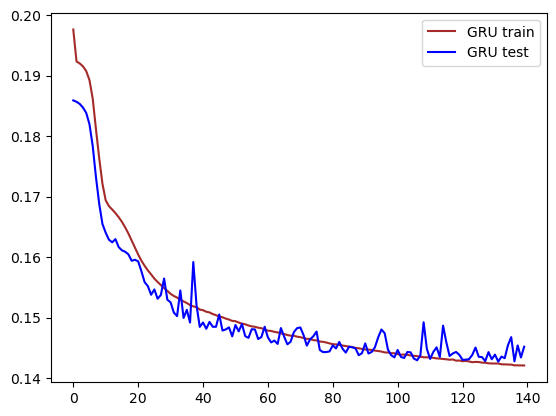

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95061, 1)

In [29]:
pred_y

array([[0.00584793],
       [0.00792779],
       [0.00599538],
       ...,
       [0.10026583],
       [0.10041922],
       [0.10167819]], dtype=float32)

In [30]:
pred_y=np.reshape(pred_y,95061)

0.1451938374090113
0.2192593163715404
0.38104309127579167
0.2940158580821818


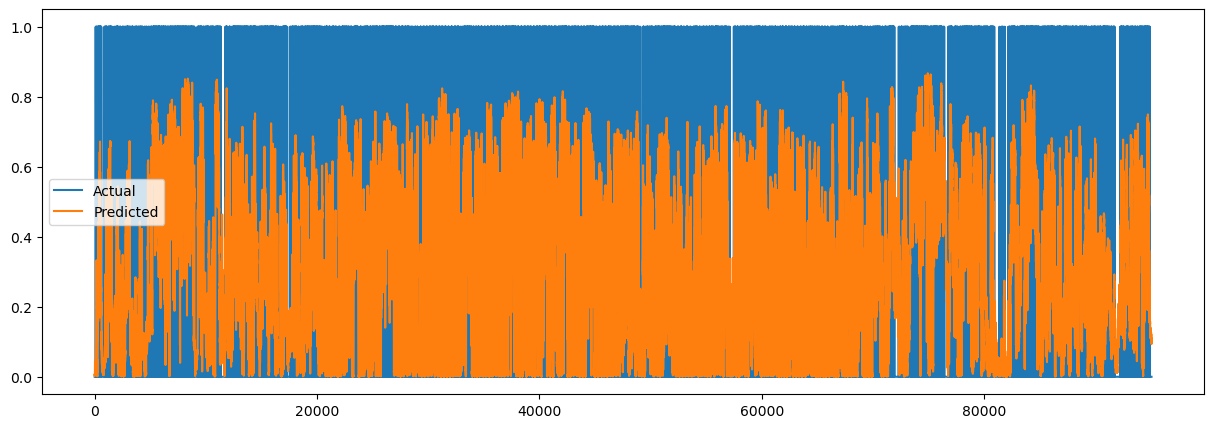

In [31]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [32]:
np.shape(train_X)

(380244, 32, 15)

In [33]:
np.shape(train_y)

(380244, 1)

In [34]:
np.shape(test_X)

(95061, 32, 15)

In [35]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 1078s 73ms/step


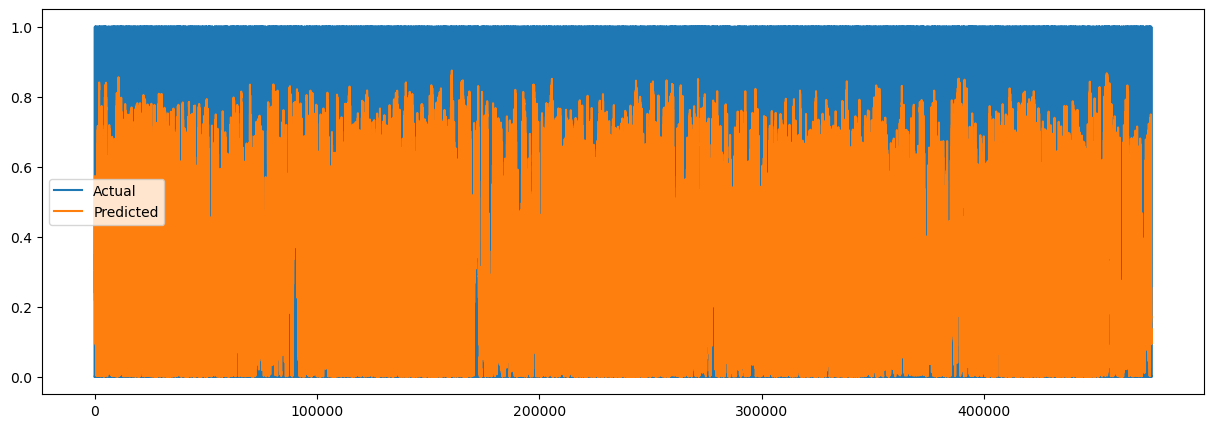

In [36]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

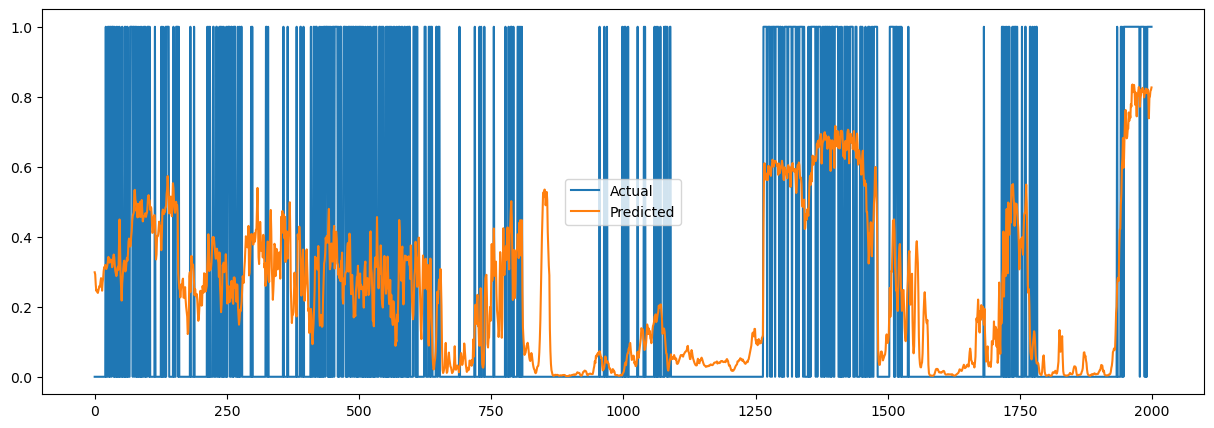

In [37]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [38]:
print(sum(tes)/len(tes))

[0.25795437]


In [39]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.57973028]
[0.84241193]
total acc [0.77995813]


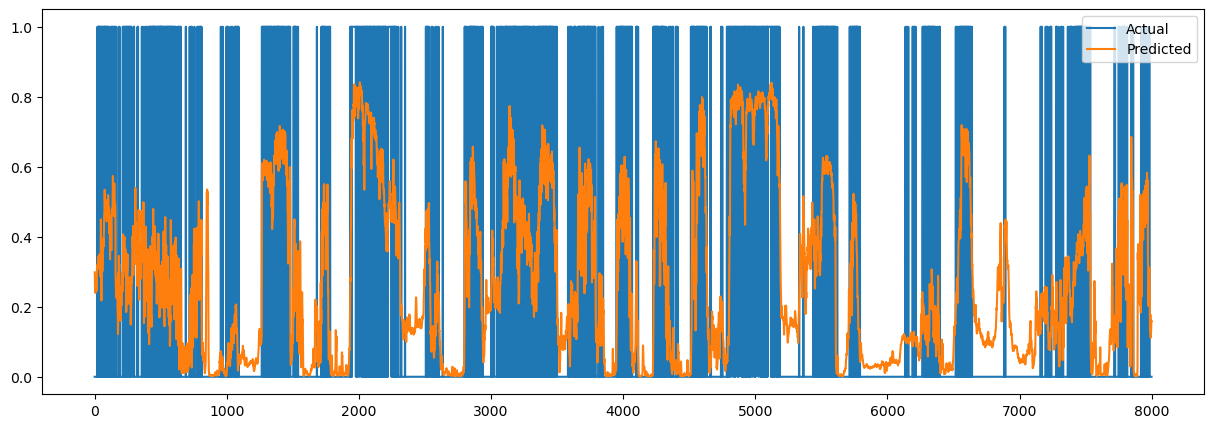

In [40]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

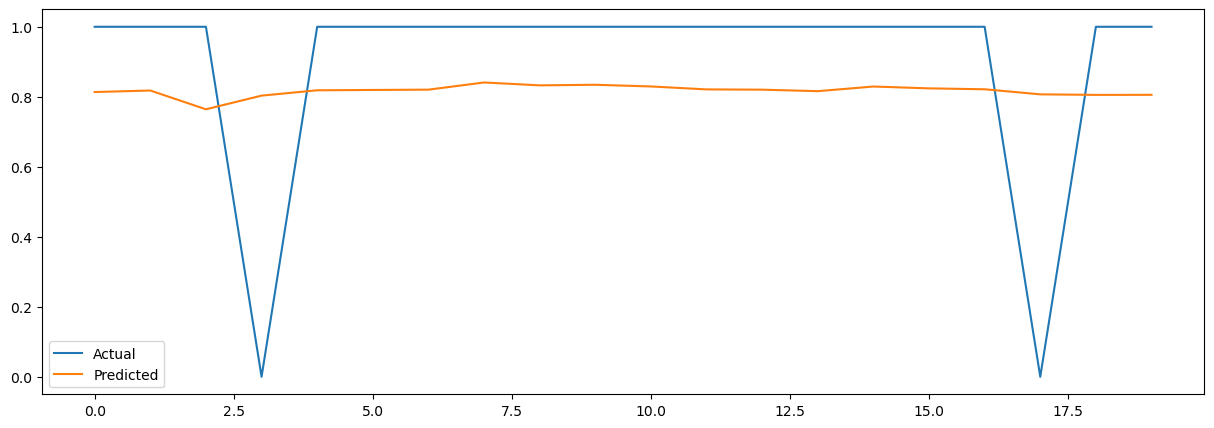

In [41]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

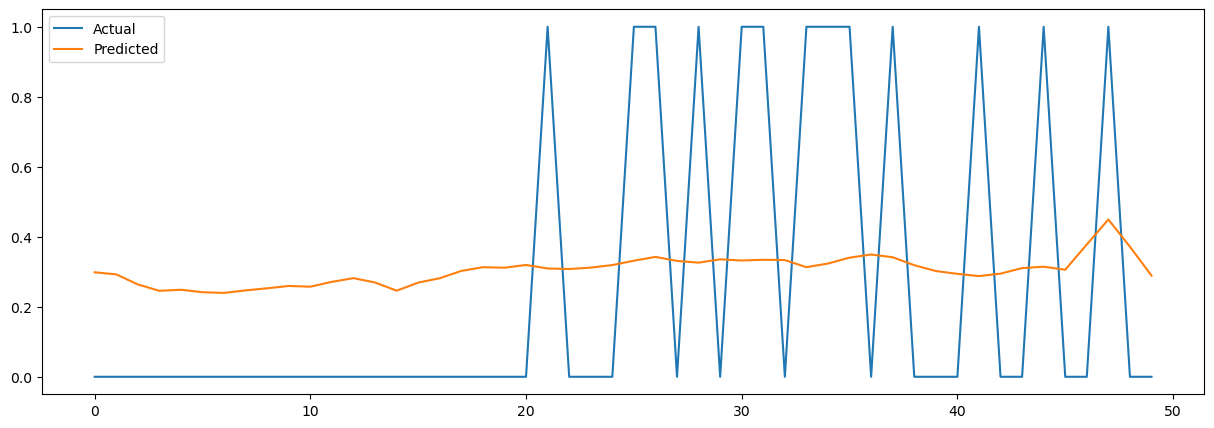

In [42]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

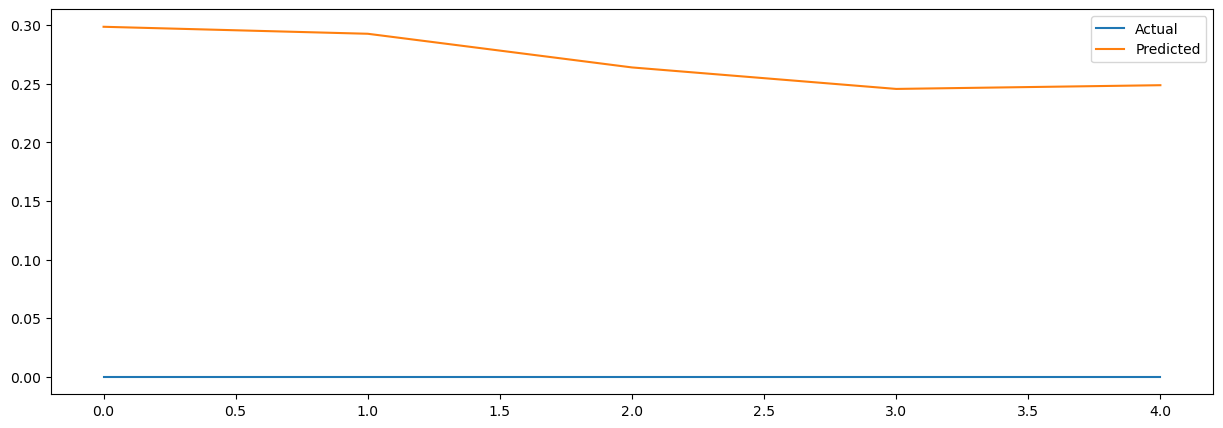

In [43]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()